In [4]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', GridSearchCV(DummyClassifier(strategy='most_frequent'), {}, n_jobs=-1))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', GridSearchCV(VotingClassifier(
#         estimators=[
#             ('nb', MultinomialNB()),
#             ('svm', SVC(probability=True)),
#             ('rf', RandomForestClassifier())
#         ],
#         voting='soft',
#         n_jobs=-1  # Utilize all available CPU cores
#     ), {}, n_jobs=-1))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6873601789709173
Ensemble Precision: 0.6756992667552313
Ensemble Recall: 0.6873601789709173
Ensemble F1-score: 0.6621950347614194


# Phase 4 NLP ML Project


![Image Description](Image/Twitter1.png)

# Activate Env

In [1]:
conda activate TFgpu


Note: you may need to restart the kernel to use updated packages.


# Load Python Packages & DF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import TweetTokenizer
import re

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text_list, tokenizer, stopwords_list, remove_words):
    '''
    Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
    Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
    '''
    # lowercase
    lower = [str(text).lower() for text in text_list]

    # tokenize
    tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

    # stopwords and special characters
    no_stops = []
    for item in tokenized:
        temp = []
        for token in item:
            if token not in stopwords_list and token not in remove_words:
                # Remove special characters
                token = re.sub(r'\W+', '', token)
                temp.append(token)
        no_stops.append(temp)

    # preparation for lemmatization
    tags = [pos_tag(tokens) for tokens in no_stops]

    better_tags = []
    for item in tags:
        temp1 = []
        for word in item:
            temp1.append((word[0], get_wordnet_pos(word[1])))
        better_tags.append(temp1)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()

    lem = []
    for item in better_tags:
        temp2 = []
        for word in item:
            temp2.append(lemmatizer.lemmatize(word[0], word[1]))
        lem.append(temp2)

    preprocessed = [' '.join(i) for i in lem]

    return preprocessed

# Read the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# Remove tweets with unknown sentiment
df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# Load and preprocess the data
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the tokenizer and stopwords list
tokenizer = TweetTokenizer()
stopwords_list = stopwords.words('english')

# Define the words to remove
remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# Create the pipeline for the dummy model
dummy_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
    ('tfidf', TfidfVectorizer()),
    ('classifier', GridSearchCV(DummyClassifier(strategy='most_frequent'), {}, n_jobs=-1))
])

# Create the pipeline for the ensemble model
ensemble_pipeline = Pipeline([
    ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
    ('tfidf', TfidfVectorizer()),
    ('classifier', GridSearchCV(VotingClassifier(
        estimators=[
            ('rf1', RandomForestClassifier()),
            ('rf2', RandomForestClassifier()),
            ('rf3', RandomForestClassifier()),
            ('rf4', RandomForestClassifier())
        ],
        voting='soft',
        n_jobs=5  # Utilize all available CPU cores
    ),
    param_grid={
        'rf1__n_estimators': [100, 200],
        'rf1__max_depth': [None, 5],
        'rf2__n_estimators': [50, 150],
        'rf2__max_depth': [None, 10],
        'rf3__n_estimators': [75, 125],
        'rf3__max_depth': [None, 15],
        'rf4__n_estimators': [80, 120],
        'rf4__max_depth': [None, 20]
    },
    cv=5,
    n_jobs=5))
])

# Train the dummy model
dummy_pipeline.fit(X_train, y_train)

# Make predictions using the dummy model
y_pred_dummy = dummy_pipeline.predict(X_test)

# Train the ensemble model
ensemble_pipeline.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_pipeline.predict(X_test)

# Calculate evaluation metrics for the dummy model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# Calculate evaluation metrics for the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# Print the evaluation metrics for the dummy model
print(f'DummyClassifier Accuracy: {accuracy_dummy}')
print(f'DummyClassifier Precision: {precision_dummy}')
print(f'DummyClassifier Recall: {recall_dummy}')
print(f'DummyClassifier F1-score: {f1_dummy}')

# Print the evaluation metrics for the ensemble model
print(f'Ensemble Accuracy: {accuracy_ensemble}')
print(f'Ensemble Precision: {precision_ensemble}')
print(f'Ensemble Recall: {recall_ensemble}')
print(f'Ensemble F1-score: {f1_ensemble}')


In [10]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', GridSearchCV(DummyClassifier(strategy='most_frequent'), {}, n_jobs=-1))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', MultinomialNB()),
#             ('svm', SVC(probability=True)),
#             ('rf', RandomForestClassifier()),
#             ('xgb1', GridSearchCV(XGBClassifier(),
#                                   param_grid={'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]})),
#             ('xgb2', GridSearchCV(XGBClassifier(),
#                                   param_grid={'n_estimators': [50, 100, 150], 'max_depth': [4, 5, 6]})),
#             ('xgb3', GridSearchCV(XGBClassifier(),
#                                   param_grid={'n_estimators': [200, 250, 300], 'max_depth': [5, 6, 7]})),
#             ('xgb4', GridSearchCV(XGBClassifier(),
#                                   param_grid={'n_estimators': [150, 200, 250], 'max_depth': [6, 7, 8]})),
#             ('xgb5', GridSearchCV(XGBClassifier(),
#                                   param_grid={'n_estimators': [300, 350, 400], 'max_depth': [7, 8, 9]}))
#         ],
#         voting='soft',
#         n_jobs=-1  # Utilize all available CPU cores
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6940715883668904
Ensemble Precision: 0.6808565661869754
Ensemble Recall: 0.6940715883668904
Ensemble F1-score: 0.6728765564554186


In [9]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', GridSearchCV(DummyClassifier(strategy='most_frequent'), {}, n_jobs=-1))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', GridSearchCV(VotingClassifier(
#         estimators=[
#             ('nb', MultinomialNB())
# #             ('svm', SVC(probability=True))
# #             ('rf', RandomForestClassifier())
# #             ('xgb1', XGBClassifier()),
# #             ('xgb2', XGBClassifier()),
# #             ('xgb3', XGBClassifier()),
# #             ('xgb4', XGBClassifier()),
# #             ('xgb5', XGBClassifier())
#         ],
#         voting='soft',
#         n_jobs=-1  # Utilize all available CPU cores
#     ), {}, n_jobs=-1))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6593959731543624
Ensemble Precision: 0.6101795275698934
Ensemble Recall: 0.6593959731543624
Ensemble F1-score: 0.599045207036748


In [ ]:
DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6923937360178971
Ensemble Precision: 0.6766285684868875
Ensemble Recall: 0.6923937360178971
Ensemble F1-score: 0.6604500074265177

nb Ensemble Accuracy: 0.6593959731543624   
svm Ensemble Accuracy: 0.6845637583892618   
RF Ensemble Accuracy: 0.6884787472035794

In [3]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', MultinomialNB(alpha=0.1)),
#             ('svm', GridSearchCV(SVC(probability=True),
#                                  param_grid={'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]},
#                                  scoring='accuracy',
#                                  cv=5)),
#             ('rf', RandomForestClassifier(n_estimators=100))
#         ],
#         voting='soft',
#         n_jobs=-1  # Utilize all available CPU cores
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6834451901565995
Ensemble Precision: 0.6696859114951017
Ensemble Recall: 0.6834451901565995
Ensemble F1-score: 0.6650411223119285


In [ ]:
DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6834451901565995
Ensemble Precision: 0.6689849640226364
Ensemble Recall: 0.6834451901565995
Ensemble F1-score: 0.6642919834364159

In [16]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re
# from scipy.stats import uniform, randint
# from skopt import BayesSearchCV

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', RandomizedSearchCV(MultinomialNB(),
#                                param_distributions={'alpha': uniform(loc=0, scale=1)},
#                                scoring='accuracy',
#                                cv=5,
#                                n_iter=10,
#                                random_state=42)),
#             ('svm', RandomizedSearchCV(SVC(probability=True),
#                                  param_distributions={'kernel': ['linear', 'rbf'], 'C': uniform(loc=0, scale=10)},
#                                  scoring='accuracy',
#                                  cv=5,
#                                  n_iter=10,
#                                  random_state=42)),
#             ('rf', RandomizedSearchCV(RandomForestClassifier(),
#                                 param_distributions={'n_estimators': randint(50, 200)},
#                                 scoring='accuracy',
#                                 cv=5,
#                                 n_iter=10,
#                                 random_state=42)),
#             ('xgb1', BayesSearchCV(XGBClassifier(),
#                                  search_spaces={'n_estimators': [100, 200, 300], 'learning_rate': (0.01, 1.0, 'uniform')},
#                                  scoring='accuracy',
#                                  cv=5,
#                                  n_iter=10,
#                                  random_state=42)),
#             ('xgb2', BayesSearchCV(XGBClassifier(),
#                                  search_spaces={'n_estimators': (100, 300), 'learning_rate': (0.01, 1.0, 'uniform')},
#                                  optimizer_kwargs={'base_estimator': 'GP'},
#                                  n_iter=10,
#                                  random_state=42))
#         ],
#         voting='soft'
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [7]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', GridSearchCV(MultinomialNB(),
#                                param_grid={'alpha': [0.1, 0.5, 1.0]},
#                                scoring='accuracy',
#                                cv=5)),
#             ('svm', GridSearchCV(SVC(probability=True),
#                                  param_grid={'kernel': ['linear', 'rbf'], 'C': [1, 10]},
#                                  scoring='accuracy',
#                                  cv=5)),
#             ('rf', GridSearchCV(RandomForestClassifier(),
#                                 param_grid={'n_estimators': [50, 100, 200]},
#                                 scoring='accuracy',
#                                 cv=5)),
#             ('xgb', GridSearchCV(XGBClassifier(),
#                                  param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
#                                  scoring='accuracy',
#                                  cv=5)),
#             ('rf2', GridSearchCV(RandomForestClassifier(),
#                                  param_grid={'n_estimators': [40, 90, 125, 150], 'max_depth': [None, 10, 20]},
#                                  scoring='accuracy',
#                                  cv=5))
#         ],
#         voting='soft'
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.685682326621924
Ensemble Precision: 0.6745794394612113
Ensemble Recall: 0.685682326621924
Ensemble F1-score: 0.6593538479675947


In [6]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')

# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention', 'link', 'ipad', 'google', 'apple', '2', 'iphone', 'austin', 'android', 'sxswi']

# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', GridSearchCV(MultinomialNB(),
#                                param_grid={'alpha': [0.1, 0.5, 1.0]},
#                                scoring='accuracy',
#                                cv=5)),
#             ('svm', GridSearchCV(SVC(probability=True),
#                                  param_grid={'kernel': ['linear', 'rbf'], 'C': [1, 10]},
#                                  scoring='accuracy',
#                                  cv=5)),
#             ('rf', GridSearchCV(RandomForestClassifier(),
#                                 param_grid={'n_estimators': [50, 100, 200]},
#                                 scoring='accuracy',
#                                 cv=5))
#         ],
#         voting='soft'
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6823266219239373
Ensemble Precision: 0.6690254857811303
Ensemble Recall: 0.6823266219239373
Ensemble F1-score: 0.6567815318301317


In [2]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import RegexpTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')





# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention','link','ipad','google','apple','2','iphone','austin','android','sxswi']  # Add your own words to remove here








# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', MultinomialNB(alpha=0.1)),
#             ('svm', SVC(kernel='linear', probability=True)),
#             ('rf', RandomForestClassifier(n_estimators=100))
#         ],
#         voting='soft'
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.685682326621924
Ensemble Precision: 0.6715343829731663
Ensemble Recall: 0.685682326621924
Ensemble F1-score: 0.6669814725818033


In [15]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.ensemble import VotingClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk import pos_tag
# from nltk.corpus import wordnet
# from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import RegexpTokenizer
# import re

# def get_wordnet_pos(treebank_tag):
#     '''
#     Translate nltk POS to wordnet tags
#     '''
#     if treebank_tag.startswith('J'):
#         return wordnet.ADJ
#     elif treebank_tag.startswith('V'):
#         return wordnet.VERB
#     elif treebank_tag.startswith('N'):
#         return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def clean_text(text_list, tokenizer, stopwords_list, remove_words):
#     '''
#     Takes in a list of strings, a tokenizer, a list of stopwords, and a list of words to remove.
#     Returns a list of lowercased, tokenized, stopwords-removed, and lemmatized words.
#     '''
#     # lowercase
#     lower = [str(text).lower() for text in text_list]

#     # tokenize
#     tokenized = [tokenizer.tokenize(tweet) for tweet in lower]

#     # stopwords and special characters
#     no_stops = []
#     for item in tokenized:
#         temp = []
#         for token in item:
#             if token not in stopwords_list and token not in remove_words:
#                 # Remove special characters
#                 token = re.sub(r'\W+', '', token)
#                 temp.append(token)
#         no_stops.append(temp)

#     # preparation for lemmatization
#     tags = [pos_tag(tokens) for tokens in no_stops]

#     better_tags = []
#     for item in tags:
#         temp1 = []
#         for word in item:
#             temp1.append((word[0], get_wordnet_pos(word[1])))
#         better_tags.append(temp1)

#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()

#     lem = []
#     for item in better_tags:
#         temp2 = []
#         for word in item:
#             temp2.append(lemmatizer.lemmatize(word[0], word[1]))
#         lem.append(temp2)

#     preprocessed = [' '.join(i) for i in lem]

#     return preprocessed

# # Read the dataset
# df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin1')

# # Remove tweets with unknown sentiment
# df = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# # Load and preprocess the data
# X = df['tweet_text']
# y = df['is_there_an_emotion_directed_at_a_brand_or_product']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create the tokenizer and stopwords list
# tokenizer = TweetTokenizer()
# stopwords_list = stopwords.words('english')





# # Define the words to remove
# remove_words = ['sxsw', 'rt', 'mention','link','ipad','google','apple','2','iphone','austin','android','sxswi']  # Add your own words to remove here








# # Create the pipeline for the dummy model
# dummy_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', DummyClassifier(strategy='most_frequent'))
# ])

# # Create the pipeline for the ensemble model
# ensemble_pipeline = Pipeline([
#     ('preprocessor', FunctionTransformer(clean_text, kw_args={'tokenizer': tokenizer, 'stopwords_list': stopwords_list, 'remove_words': remove_words})),
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', VotingClassifier(
#         estimators=[
#             ('nb', MultinomialNB(alpha=0.1)),
#             ('svm', SVC(kernel='linear', probability=True)),
#             ('rf', RandomForestClassifier(n_estimators=100))
#         ],
#         voting='soft'
#     ))
# ])

# # Train the dummy model
# dummy_pipeline.fit(X_train, y_train)

# # Make predictions using the dummy model
# y_pred_dummy = dummy_pipeline.predict(X_test)

# # Train the ensemble model
# ensemble_pipeline.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_pipeline.predict(X_test)

# # Calculate evaluation metrics for the dummy model
# accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
# precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)
# f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted', zero_division=1.0)

# # Calculate evaluation metrics for the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)
# f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1.0)

# # Print the evaluation metrics for the dummy model
# print(f'DummyClassifier Accuracy: {accuracy_dummy}')
# print(f'DummyClassifier Precision: {precision_dummy}')
# print(f'DummyClassifier Recall: {recall_dummy}')
# print(f'DummyClassifier F1-score: {f1_dummy}')

# # Print the evaluation metrics for the ensemble model
# print(f'Ensemble Accuracy: {accuracy_ensemble}')
# print(f'Ensemble Precision: {precision_ensemble}')
# print(f'Ensemble Recall: {recall_ensemble}')
# print(f'Ensemble F1-score: {f1_ensemble}')


DummyClassifier Accuracy: 0.6124161073825504
DummyClassifier Precision: 0.7626373811990451
DummyClassifier Recall: 0.6124161073825504
DummyClassifier F1-score: 0.4652068245465783
Ensemble Accuracy: 0.6834451901565995
Ensemble Precision: 0.6696363888561693
Ensemble Recall: 0.6834451901565995
Ensemble F1-score: 0.6648001091013169


In [3]:
from collections import Counter

# Clean the text data
X_cleaned = clean_text(X, tokenizer, stopwords_list, remove_words)

# Tokenize the cleaned text
tokens = [token for tweet_tokens in X_cleaned for token in tokenizer.tokenize(tweet_tokens)]

# Remove the words specified for removal
tokens_filtered = [token for token in tokens if token not in remove_words]

# Count the frequency of each word
word_counts = Counter(tokens_filtered)

# Get the top 10 most common words and their frequencies
top_words = word_counts.most_common(30)

# Extract the words
words = [word for word, _ in top_words]

# Print the top 10 words
print("Top 30 Words:")
for word in words:
    print(word)


Top 30 Words:
store
new
launch
app
get
circle
social
popup
today
network
go
line
open
via
party
call
free
mobile
come
one
time
see
major
win
like
use
make
day
map
temporary


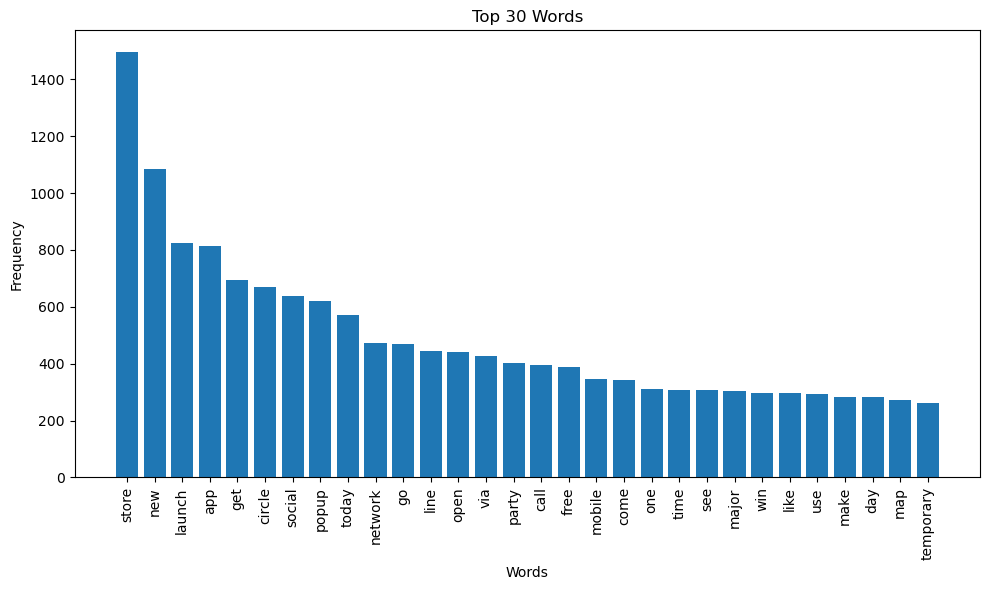

In [4]:
import matplotlib.pyplot as plt

# Top 10 words and their frequencies
top_words = word_counts.most_common(30)
words, frequencies = zip(*top_words)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


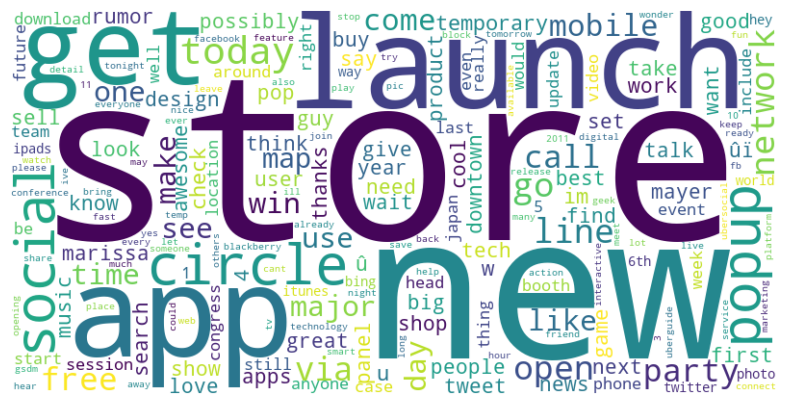

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Clean the text data
X_cleaned = clean_text(X, tokenizer, stopwords_list, remove_words)

# Tokenize the cleaned text
tokens = [token for tweet_tokens in X_cleaned for token in tokenizer.tokenize(tweet_tokens)]

# Remove the words specified for removal
tokens_filtered = [token for token in tokens if token not in remove_words]

# Create a frequency dictionary of the filtered words
word_freq = {}
for word in tokens_filtered:
    word_freq[word] = word_freq.get(word, 0) + 1

# Generate the word cloud based on the word frequency
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the Multinomial Naive Bayes model
nb.fit(X_train_preprocessed, y_train)

# Get the feature log probabilities for each class
feature_log_probs = nb.feature_log_prob_

# Calculate the exponential of the feature log probabilities
feature_probs = np.exp(feature_log_probs)

# Access the feature importance scores for each class
class_importances = feature_probs

# Define the feature names (assuming you're using TfidfVectorizer)
feature_names = preprocessor.get_feature_names_out()

top_n = 30  # Specify the number of top features to display

# Get the class names from the model
class_names = nb.classes_

# Create separate figures and axes for each class
figs = []
axes = []
for i in range(class_importances.shape[0]):
    fig, ax = plt.subplots(figsize=(10, 6))
    figs.append(fig)
    axes.append(ax)

    # Sort the features by importance
    class_importance_sorted = class_importances[i].argsort()[-top_n:][::-1]

    # Plot the top N features and their importances
    ax.barh(np.array(feature_names)[class_importance_sorted], class_importances[i][class_importance_sorted])

    # Customize the plot
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature')
    ax.set_title(f'Multinomial Naive Bayes - Class {class_names[i]} - Top {top_n} Features')

    # Adjust the layout
    plt.tight_layout()

# Show the plots
plt.show()


NameError: name 'nb' is not defined

# Model 2 Analysis - Supervised Machine Learning Algorithm

In [34]:
model2.fit(X_train_preprocessed, y_train)
coefficients = model2.coef_

In [35]:
coefficients

<3x7418 sparse matrix of type '<class 'numpy.float64'>'
	with 13922 stored elements in Compressed Sparse Row format>

In [36]:
# ABS Value below graph

In [37]:
top_n = 10  # Specify the number of top features to display

# Sort the features by the absolute magnitude of coefficients for each class
class_sorted_indices = np.argsort(np.abs(coefficients), axis=1)[:, -top_n:]

# Reverse the order of the sorted indices
class_sorted_indices = np.flip(class_sorted_indices, axis=1)

# Get the top N features and their corresponding coefficients
top_features = np.array(feature_names)[class_sorted_indices]
top_coefficients = np.take_along_axis(coefficients, class_sorted_indices, axis=1)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the top N features and their coefficients for each class
for i in range(coefficients.shape[0]):
    ax.barh(top_features[i], top_coefficients[i], label=f'Class {i}')

# Customize the plot
ax.set_xlabel('Coefficient Value')
ax.set_ylabel('Feature')
ax.set_title('Linear SVM - Top 10 Features')
ax.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


ValueError: WRITEBACKIFCOPY base is read-only

In [38]:
import matplotlib.pyplot as plt

top_n = 30  # Specify the number of top features to display

# Sort the features by the absolute magnitude of coefficients for each class
class_sorted_indices = np.argsort(np.abs(coefficients), axis=1)[:, -top_n:]

# Reverse the order of the sorted indices
class_sorted_indices = np.flip(class_sorted_indices, axis=1)

# Get the top N features and their corresponding coefficients
top_features = np.array(feature_names)[class_sorted_indices]
top_coefficients = np.take_along_axis(coefficients, class_sorted_indices, axis=1)

# Get the class names
class_names = model1.classes_

# Get the number of classes
num_classes = coefficients.shape[0]

# Create separate figures and axes for each class
figs = []
axes = []
for i in range(num_classes):
    fig, ax = plt.subplots(figsize=(20, 12))
    figs.append(fig)
    axes.append(ax)

# Plot the top N features and their coefficients for each class
for i in range(num_classes):
    ax = axes[i]
    ax.barh(top_features[i], top_coefficients[i], label=f'Class {class_names[i]}')
    ax.set_xlabel('Coefficient Value', fontsize=30)  # Increase font size for x-axis label
    ax.set_ylabel('Feature', fontsize=20)  # Increase font size for y-axis label
    ax.set_title(f'Linear SVM - {class_names[i]} - Top {top_n} Features', fontsize=25)  # Increase font size for title
    ax.legend(fontsize=14)  # Increase font size for legend
    ax.tick_params(axis='both', labelsize=16)  # Increase font size for tick labels
    plt.tight_layout()

# Show the plots
plt.show()


ValueError: WRITEBACKIFCOPY base is read-only

# Model 3 Analysis - Random Forest Model

In [39]:
model3.fit(X_train_preprocessed, y_train)
importances = model3.feature_importances_

In [40]:
importances

array([3.97835628e-04, 3.22059873e-04, 2.33880592e-06, ...,
       2.24398297e-06, 4.50572458e-08, 6.22548638e-05])

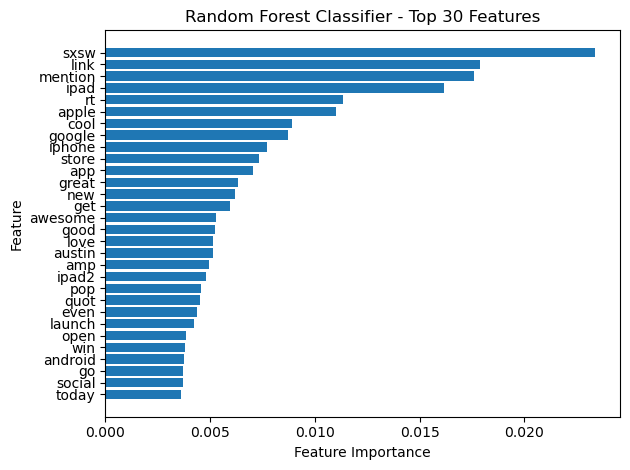

In [41]:
import matplotlib.pyplot as plt

# Fit the Random Forest Classifier model
model3.fit(X_train_preprocessed, y_train)

# Get the feature importances
importances = model3.feature_importances_

# Get the indices of features sorted by importance
sorted_indices = np.argsort(importances)

# Get the top N features and their importances
top_n = 30  # Specify the number of top features to display
top_features = feature_names[sorted_indices][-top_n:]
top_importances = importances[sorted_indices][-top_n:]

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the top N features and their importances
ax.barh(top_features, top_importances)

# Customize the plot
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Random Forest Classifier - Top 30 Features')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


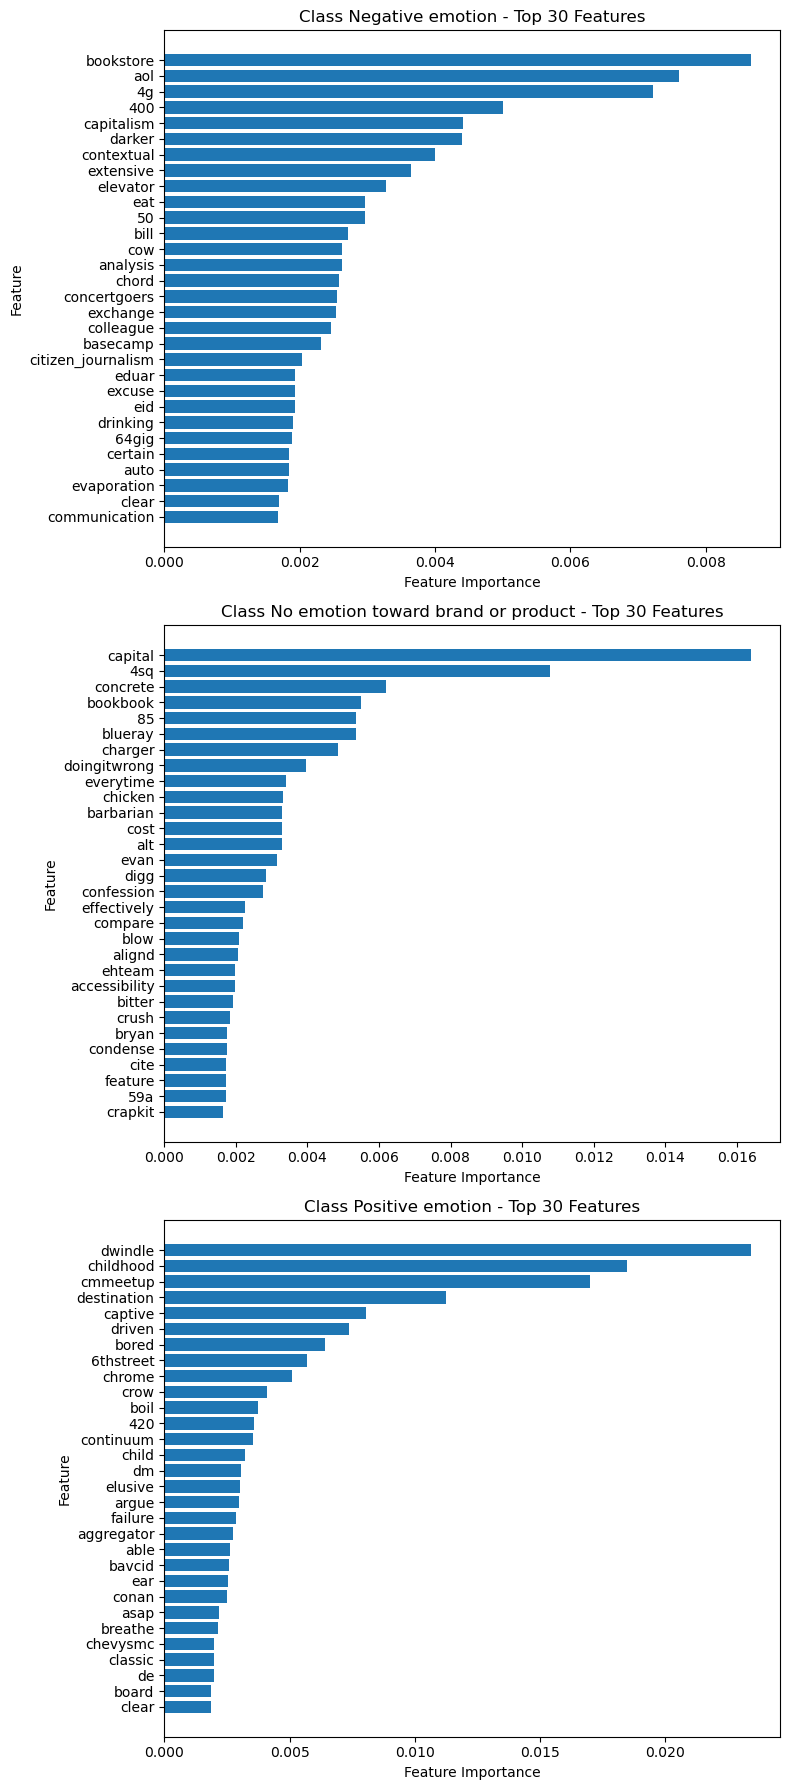

In [42]:
import matplotlib.pyplot as plt

# Fit the Random Forest Classifier model
model3.fit(X_train_preprocessed, y_train)

# Get the feature importances
importances = model3.feature_importances_

# Get the number of classes
num_classes = len(model3.classes_)

# Create a figure with subplots for each class
fig, axes = plt.subplots(nrows=num_classes, figsize=(8, 6 * num_classes))

# Iterate over each class
for i, class_label in enumerate(model3.classes_):
    # Get the feature importances for the current class
    class_importances = importances[i::num_classes]

    # Get the indices of features sorted by importance
    sorted_indices = np.argsort(class_importances)

    # Get the top N features and their importances
    top_n = 30  # Specify the number of top features to display
    top_features = feature_names[sorted_indices][-top_n:]
    top_importances = class_importances[sorted_indices][-top_n:]

    # Create the subplot for the current class
    ax = axes[i]

    # Plot the top N features and their importances for the current class
    ax.barh(top_features, top_importances)

    # Set the subplot title
    ax.set_title(f'Class {class_label} - Top {top_n} Features')

    # Set the subplot xlabel
    ax.set_xlabel('Feature Importance')

    # Set the subplot ylabel
    ax.set_ylabel('Feature')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
